In [6]:
import pandas as pd

df = pd.read_csv("dataset_phishing.csv")
copy = df.copy()
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [12]:
#encoding non-numeric features

encoding1 = {'legitimate': 1, 'phishing': 0}
df['status'] = df['status'].replace(encoding)

#remove url from df

df = df.drop('url', axis = 1)

df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,0
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


In [13]:
#separate into training and testing sets

from sklearn.model_selection import train_test_split

X, y = df.drop('status', axis = 1).to_numpy(), df['status'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

RF1 = RandomForestClassifier(n_estimators=10, random_state=0)
RF1.fit(X_train, y_train)
y_pred = RF1.predict(X_test)

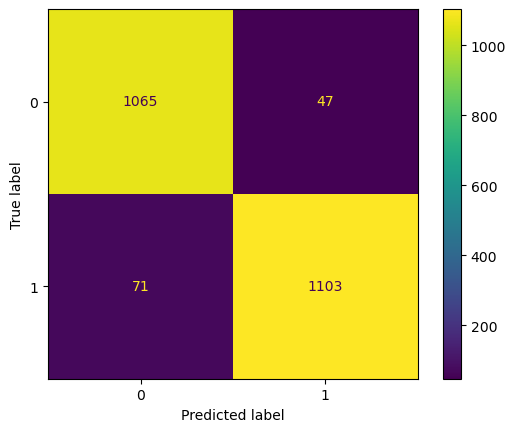

In [21]:
#making confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=RF1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF1.classes_)
disp.plot()
plt.show()

In [23]:
#insert here the accuracy evaluation methods we did in class, something about using fractions and the TP, FP, etc values

In [17]:
#find most important features using the sklearn model feature importance property
#recalculate predictions using a random forest classifier

from sklearn.ensemble import RandomForestClassifier
import numpy as np

RF2 = RandomForestClassifier(n_estimators=10, random_state=0)

importance = None
mask = None
 
RF2.fit(X_train, y_train)
importance = RF2.feature_importances_

median = np.median(importance)
mask = importance > median
    
print(mask)

[ True  True False  True  True False  True  True False  True  True False
 False  True False False False False False False  True False False False
 False  True  True False False False False False  True False False False
 False  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False  True  True  True False
 False False  True False  True False False  True False  True  True False
 False False  True False False False  True  True False  True  True  True
 False  True  True]
